# Practicals for lecture 1.4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2025/blob/main/practicals/Practicals_1.4.ipynb)

#### 1.4.0 Organize a dataframe

In [1]:
import numpy as np
import pandas as pd


# Let's have a look into how to organize data in a dataframe.

# Use the following function that generates results for many subjects on
# an experiment with experimental trials of different difficulty levels.

def get_experiment_block_data(n_subjects=50, difficulty_levels=(1, 2, 3, 4, 5), n_repetitions=50):
    """Generate a dataframe with results from an experiment with experimental blocks.

    Parameters
    ----------
    n_reps : int
        Number of experimental blocks.
    n_subjects : int
        Number of subjects.
    difficulty_levels : tuple
        Difficulty levels of the experimental blocks.

    Returns
    -------
    dict
        A dictionary with the results of the experiment for each subject.


    """

    np.random.seed(42)
    subject_dict = dict()
    for subject in range(n_subjects):
        subject_ability = np.random.randint(1, 6)
        difficulty_level_arr = np.random.choice(difficulty_levels, size=n_repetitions)
        rt = np.random.normal(1000, 100, size=n_repetitions) * difficulty_level_arr / subject_ability
        error = np.random.uniform(0, 1000*difficulty_level_arr / subject_ability, size=n_repetitions)

        subject_dict[f"subject_{subject}"] = dict(
            difficulty_level=difficulty_level_arr,
            rt=rt,
            error=error,
        )

    return subject_dict


# Run the function to generate the data dictionary.
data = get_experiment_block_data()

# Data is a dictionary with an entry for every subject. Have a look!
# Each entry is itself a list, with the trial by trial data
# on task difficulty, rection times, and trial error.

In [10]:
# Convert this nested data to a (flat) dataframe containing all data.
# (Hint: you can create a DataFrame for every subject and then concatenate) 
from matplotlib import pyplot as plt
df_list = []

for sub_id, trial_data in data.items():
    df = pd.DataFrame(trial_data)
    df["sub_id"] = sub_id
    # df.index = [f"{sub_id}_{i}" for i in range(len(df))]
    df_list.append(df)
    
pooled_df = pd.concat(df_list).reset_index()
pooled_df

,index,difficulty_level,rt,error,sub_id
0,0,5,1122.305976,944.438923,subject_0
1,1,3,737.868346,171.598624,subject_0
2,2,5,1183.293900,96.224887,subject_0
3,3,5,1249.309017,362.189316,subject_0
4,4,2,488.527477,80.610644,subject_0
...,...,...,...,...,...
2495,45,2,1205.314018,537.379190,subject_49
2496,46,5,2411.307870,2101.962680,subject_49
2497,47,1,505.467029,16.713267,subject_49
2498,48,2,1129.582707,366.752076,subject_49


<Axes: xlabel='difficulty_level', ylabel='rt'>

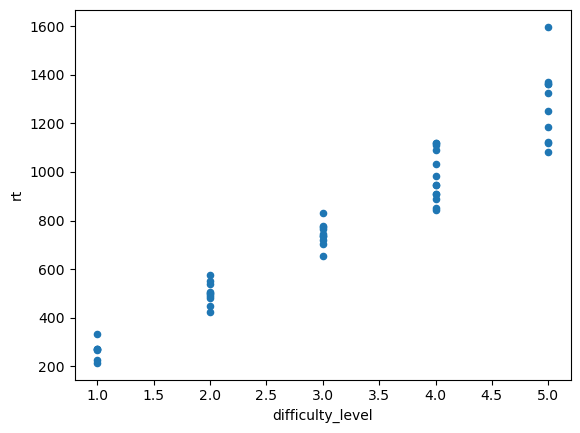

In [3]:
# Select the data for subject 0, and create a scatter plot 
# with the reaction time as a function of the trial difficulty level
# (Hint: remember the dataframe.plot() function from last lecture)
sub_0_df = pooled_df[pooled_df["sub_id"] == "subject_0"]
sub_0_df.plot(kind="scatter",x="difficulty_level", y="rt")

In [6]:
# Load the subjects dataframe from the csv file at the url:
# https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv

subject_df = pd.read_csv("https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv",
                         index_col=0)
subject_df.head()

,sex,handedness,age
subject_0,F,left,37
subject_1,M,right,31
subject_2,F,left,21
subject_3,F,right,29
subject_4,F,left,23


<Axes: xlabel='difficulty_level', ylabel='rt'>

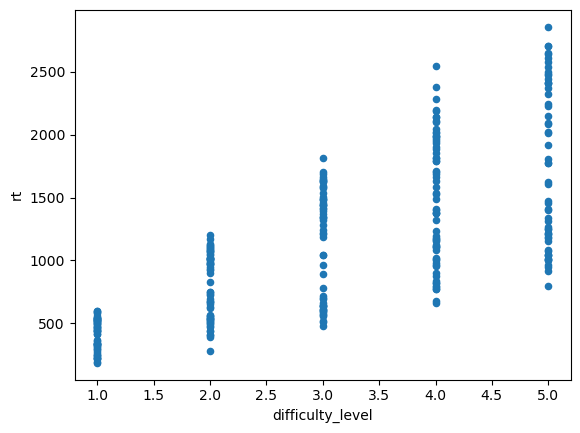

In [13]:
# Now use boolean indexing on the subject dataframe to include only left-handed males 
# above 30 years in the analysis.
# Plot the reaction time as a function of the trial difficulty 
# level for this subpopulation only:

subject_boolean_mask = (subject_df["age"] < 30) & (subject_df["sex"] == "M") & (subject_df["handedness"] == "left")

trials_boolean_mask = pooled_df["sub_id"].isin(subject_df[subject_boolean_mask].index)

filtered_trials_df = pooled_df[trials_boolean_mask]
filtered_trials_df.plot(kind="scatter",x="difficulty_level", y="rt")
                                           

In [3]:
# [Advanced]
# The Allen Brain Observatory dataset (https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html)
# contains electrophysiology data (single neuron activity) from hundreds of
# recording sessions in the visual cortex of mice.

# Here you find some of their data:

# - a neuron_csv with information about individual neurons from all electrodes from all sessions
#   Each neuron has a channel_id column that specifies which electrode it was recorded from
#   link: https://github.com/vigji/python-cimec-2024/raw/main/practicals/data/allen_neurons.csv

# - A channel_csv with information about individual electrodes from all sessions.
#   Each channel has a session_id that specifies from which session it was recorded
#   and a ecephys_structure_acronym column with the acronym of the brain area
#   where the electrode was:
#   link: https://github.com/vigji/python-cimec-2024/raw/main/practicals/data/allen_channels.csv

# - A session_csv with information about all sessions and the animal that was recorded 
#   in that session.
#   link: https://github.com/vigji/python-cimec-2024/raw/main/practicals/data/allen_sessions.csv 

# Use the read_csv function to read data from the links!
import pandas as pd
root_url_string = "https://github.com/vigji/python-cimec-2024/raw/main/practicals/data/"


In [5]:
# Select only neurons that were recorded in animals of wild type genotype (wt/wt)
# and have a valid entry in the g_dsi_dg (their direction selectivity index)


#### 1.4.1  `.groupby()` and index broadcasting

In [15]:
# Take the meteo dataset using the function below
import numpy as np

def get_meteo_dataset():
    """Get a meteo dataset from the open-meteo API using a fixed window.
    Note how easy it is to get data from the web with pandas! As long as we give the URL of the csv data, pandas can read it.
    """
    np.random.seed(42)
    # URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,winddirection_10m&start_date=2023-02-10&end_date=2023-05-28&format=csv"
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m&start_date=2025-04-01&end_date=2025-04-20&format=csv"
    df = pd.read_csv(URL, skiprows=6)  # read the csv file, skipping the first 3 rows (a header)
    df.columns = [col.split(" ")[0] for col in df.columns]  # simplify column names
    df["time"] = pd.to_datetime(df["time"])  # convert the time column to datetime
    df["hour"], df["dayofyear"] = df["time"].dt.hour, df["time"].dt.dayofyear  # extract the hour and day of year

    # Here we artificially corrupt some of the data:
    missing_idx = np.random.choice(df.index[:1000], 100)
    df.loc[missing_idx, :] = np.nan
    return df

# This new meteo dataset has columns for the day of the year, 
# hour of the day, and day of the week.
# Check out the data and make sure we don't have missing values!
df = get_meteo_dataset()
df

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m,hour,dayofyear
0,2025-04-01 00:00:00,6.1,82.0,0.0,9.7,4.0,0.0,91.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-04-01 02:00:00,5.2,84.0,0.0,8.4,20.0,2.0,91.0
3,2025-04-01 03:00:00,5.4,85.0,0.0,8.3,18.0,3.0,91.0
4,2025-04-01 04:00:00,5.1,86.0,0.0,8.2,15.0,4.0,91.0
...,...,...,...,...,...,...,...,...
475,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,2025-04-20 21:00:00,15.5,74.0,0.0,3.2,90.0,21.0,110.0
478,2025-04-20 22:00:00,14.8,75.0,0.0,2.9,97.0,22.0,110.0


In [22]:
# Use the .groupby() method to compute the mean temperature for each hour of the day:
df.groupby("hour")["temperature_2m"].mean()

hour
0.0      9.450000
1.0      9.333333
2.0      8.527778
3.0      6.508333
4.0      7.957895
5.0      7.035714
6.0      8.160000
7.0      8.681250
8.0     10.183333
9.0     12.312500
10.0    14.666667
11.0    15.133333
12.0    15.012500
13.0    16.623529
14.0    16.600000
15.0    15.994737
16.0    15.588235
17.0    15.282353
18.0    14.058824
19.0    13.792308
20.0    12.425000
21.0    11.829412
22.0    11.746667
23.0    10.175000
Name: temperature_2m, dtype: float64

<Axes: >

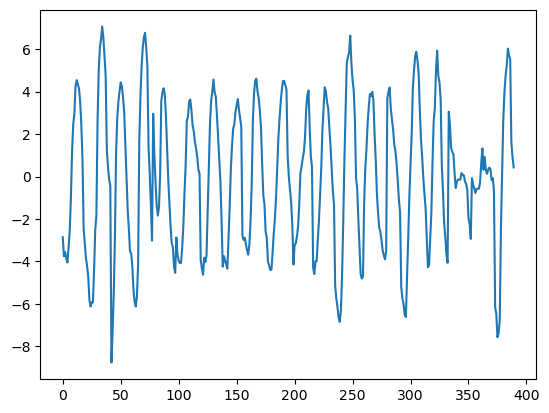

In [35]:
# Using pandas index broadcasting, subtract from each day of the year 
# its average temperature, and plot the result to check if it makes sense.
# (Hint: you will have to set a new index to the dataframe 
# for the broadcasting to work):
from matplotlib import pyplot as plt


daily_avg_subtract = df.set_index("dayofyear")["temperature_2m"] - df.groupby("dayofyear")["temperature_2m"].mean()

daily_avg_subtract.reset_index()["temperature_2m"].plot()

In [8]:
# [Advanced]

# From the Allen datasets you have loaded above, produce a new dataframe 
# that for every brain area has a column with the average firing rate
# and a column with the average direction selectivity index for that area.

# Sort the areas by average DSI; do the first acronyms that you see
# make sense? (to find the meanings of the acronyms, you can read the
# structures csv file at 
# https://github.com/vigji/python-cimec-2024/raw/main/practicals/data/allen_structures.csv 



In [59]:
# [Advanced]

# Now, let's make a new column "Z-scored firing rate" where, for every neuron,
# we add the firing rate z-scored within each brain area.
# Compute mean and std of firing rate for every area, and compute the Z-score
# for every neuron using the mean and std for the brain area it belongs to!
# (no for loops of course)

#### 1.4.2 `.rolling()`

In [5]:
# Compute the maximum and the minimum of the temperature using a rolling window of 24 samples.
# Plot the original curve and the smoothed one to check what you did:

